# Part 1 - Warm-Up

# Task 1

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [111]:
# Load the data

data_df = pd.read_csv('task-1.csv')
data_df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


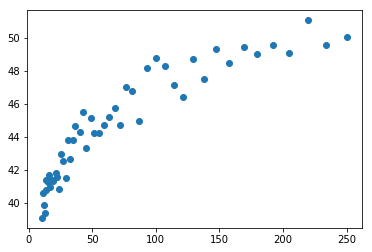

In [112]:
plt.scatter(data_df.x,data_df.y)
plt.show()

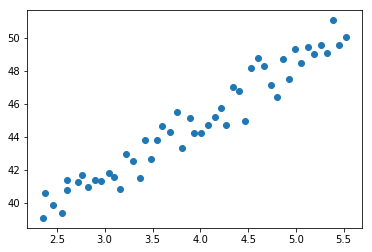

In [113]:
plt.scatter(np.log(data_df.x),data_df.y)
plt.show()

In [114]:
# LinearRegression uses OLS to optimize RSS
from sklearn.linear_model import LinearRegression


In [115]:
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

In [116]:
# Uing polyfit as we have only one entry
linreg = LinearRegression()

x1 = np.log(data_df.x).values

y1 = data_df.y.values

print(x1.shape)
print(y1.shape)

(50,)
(50,)


In [117]:
# Fit it
X1 =x1[:,np.newaxis]
linreg.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
coefs = np.polyfit(x1, y1, deg=1)
print('Coefficients:', coefs)

Coefficients: [ 3.390241   31.52920122]


In [119]:
# Generate a hundred data points between min(x) and max(x)
x_values = np.linspace(min(x1), max(x1), num=100)
# Compute predictions for these sample data points
    # Using Polyfit / Polyval
y_values_poly = np.polyval(coefs, x_values)
    # Using LinearRegression
y_values_linreg = linreg.predict(x_values[:,np.newaxis])

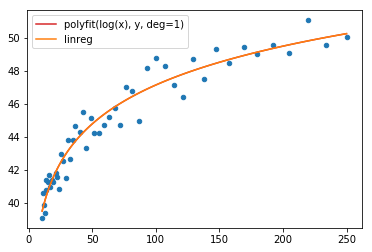

In [120]:
plt.scatter(np.exp(x1), y1, s=20, label=None)
plt.plot(np.exp(x_values), y_values_poly, c='C3', label='polyfit(log(x), y, deg=1)')
plt.plot(np.exp(x_values), y_values_linreg, c='C1', label='linreg')
plt.legend()
plt.show()

In [121]:
    # Using Polyfit / Polyval
y_pred_poly = np.polyval(coefs, x1)
    # Using LinearRegression
y_pred_linreg = linreg.predict(x1[:,np.newaxis])

RSS_linreg = RSS(y1 ,y_pred_linreg)
RSS_poly =RSS(y1 , y_pred_poly)
RSS_baseline = RSS(y1 , np.mean(y1))

print('LinearRegression',RSS_linreg)
print('PolyFit',RSS_poly)
print('Mean Baseline', RSS_baseline)



LinearRegression 31.842651752756762
PolyFit 31.842651752756687
Mean Baseline 541.1432872199999


As we can see, LinearRegression and Polyval/Fit have the same result, which makes sense as they both use analytical method OLS to optimize RSS analytically, so we do not have the "randomness" of a gradient descent for example.

### R2 measure : 


In [140]:
R2 = 1 - RSS_poly / RSS_baseline
R2

0.9411567093138288

### Conlusion

Indeed, the R2 is very close to 1 (0.94) so it is a quite good result which is explained by the 541 for the mean Baseline vs 32 for LinearRegression. (I also noticed the median baseline have the almost exact same RSS..)

# Task 2

In [239]:
from sklearn.metrics import mean_absolute_error as MAE

# Load the data

data_df = pd.read_csv('task-2.csv')
data_df.head()



,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [261]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X = data_df.drop('y', axis=1).values
y = data_df.y.values
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2)


In [262]:
# Remove outliers
# Compute z-scores
z_scores = (y_tr - np.mean(y_tr)) / np.std(y_tr)
z_scores_te = (y_te - np.mean(y_tr)) / np.std(y_tr)

# Detect "extreme" data points
# 2 standard deviations away form the mean
idx = np.abs(z_scores) < 2
idx_te = np.abs(z_scores_te) < 2

# Remove them
X_tr2, y_tr2 = X_tr[idx], y_tr[idx]
X_te2, y_te2 = X_te[idx_te], y_te[idx_te]

In [263]:
# With Outliers
linreg = LinearRegression()
# Fit it
linreg.fit(X_tr, y_tr);

from sklearn.linear_model import HuberRegressor
# Create a linear regression with Huber loss
lr_huber = HuberRegressor(epsilon=1.35)
lr_huber.fit(X_tr, y_tr)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [264]:
# Without Outliers
linreg_wo = LinearRegression()

# Fit it
linreg_wo.fit(X_tr2, y_tr2);

In [265]:
y_pred_lreg = linreg.predict(X_te)
y_pred_lreg_wo = linreg_wo.predict(X_te2)
y_pred_huber = lr_huber.predict(X_te)

In [266]:
X_tr2.shape

(764, 3)

In [267]:
MAE_lreg = MAE(y_te,y_pred_lreg)
MAE_lreg_wo = MAE(y_te2,y_pred_lreg_wo)
MAE_huber = MAE(y_te,y_pred_huber)

print('with outliers',MAE_lreg)
print('without outliers',MAE_lreg_wo)
print('huber loss',MAE_huber)

with outliers 119.1569743994203
without outliers 112.43420098677147
huber loss 99.60294918220715
